In [2]:
import pandas as pd
df = pd.read_csv('nhgh.tsv', delimiter='\t', header=0)
df.head()

seqn     sex        age                  re         income  tx  dx     wt  \
0  51624    male  34.166667  Non-Hispanic White  [25000,35000)   0   0   87.4   
1  51626    male  16.833333  Non-Hispanic Black  [45000,55000)   0   0   72.3   
2  51628  female  60.166667  Non-Hispanic Black  [10000,15000)   1   1  116.8   
3  51629    male  26.083333    Mexican American  [25000,35000)   0   0   97.6   
4  51630  female  49.666667  Non-Hispanic White  [35000,45000)   0   0   86.7   

      ht    bmi   leg  arml  armc  waist   tri   sub   gh  albumin   bun   SCr  
0  164.7  32.22  41.5  40.0  36.4  100.4  16.4  24.9  5.2      4.8   6.0  0.94  
1  181.3  22.00  42.0  39.5  26.6   74.7  10.2  10.5  5.7      4.6   9.0  0.89  
2  166.0  42.39  35.3  39.0  42.2  118.2  29.6  35.6  6.0      3.9  10.0  1.11  
3  173.0  32.61  41.7  38.7  37.0  103.7  19.0  23.2  5.1      4.2   8.0  0.80  
4  168.4  30.57  37.5  36.1  33.3  107.8  30.3  28.0  5.3      4.3  13.0  0.79

In [3]:
dfNa = df[df.isna().any(axis=1)]
dfNa2 = df[df['sub'].isna()]
print(dfNa)
print(len(df.index))
print(len(dfNa.index))
print(len(dfNa2.index))

       seqn     sex        age                  re         income  tx  dx  \
9     51643  female  43.000000  Non-Hispanic Black  [35000,45000)   1   1   
10    51645    male  66.416667    Mexican American   [5000,10000)   0   0   
13    51651  female  19.333333  Non-Hispanic Black  [20000,25000)   0   0   
20    51660    male  32.833333    Mexican American  [25000,35000)   0   0   
30    51672  female  27.916667  Non-Hispanic White  [45000,55000)   0   0   
...     ...     ...        ...                 ...            ...  ..  ..   
6761  62109  female  17.750000  Non-Hispanic Black   [5000,10000)   0   0   
6763  62112  female  58.333333      Other Hispanic  [10000,15000)   1   1   
6776  62136    male  70.333333    Mexican American   [5000,10000)   0   0   
6790  62155    male  33.000000    Mexican American  [35000,45000)   0   0   
6794  62160  female  63.583333      Other Hispanic            NaN   1   1   

         wt     ht    bmi   leg  arml  armc  waist   tri   sub    gh  album

<font color='blue' ><b>
From the above result, it can be seen that there is about 21% of the data containing NA values. 
By a close examination of the rows, it can be seen that many of them are missing values in columns of subscapular skinfold thickness measurement. 
According to the result from Andrea, Rodrigo, Et Al the value of subscapular skinfold thickness has a very strong association with the developing of type2 diabetes (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960014/) which lead to a decision to drop these rows instead of filling them with an zero/mean value.
<b></font>

In [11]:
columns_to_encode = ['sex', 're', 'income']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded['gh'] = df_encoded['gh'].apply(lambda x: 1 if x >= 6.5 else 0)
df_encoded = df_encoded.drop('seqn', axis=1)
df_encoded

age  tx  dx     wt     ht    bmi   leg  arml  armc  waist  ...  \
0     34.166667   0   0   87.4  164.7  32.22  41.5  40.0  36.4  100.4  ...   
1     16.833333   0   0   72.3  181.3  22.00  42.0  39.5  26.6   74.7  ...   
2     60.166667   1   1  116.8  166.0  42.39  35.3  39.0  42.2  118.2  ...   
3     26.083333   0   0   97.6  173.0  32.61  41.7  38.7  37.0  103.7  ...   
4     49.666667   0   0   86.7  168.4  30.57  37.5  36.1  33.3  107.8  ...   
...         ...  ..  ..    ...    ...    ...   ...   ...   ...    ...  ...   
6790  33.000000   0   0   94.3  163.5  35.28  34.4  34.7  35.5  112.3  ...   
6791  48.916667   0   1   87.1  156.9  35.38  33.9  34.5  37.0   99.4  ...   
6792  27.500000   0   0   57.0  164.3  21.12  35.3  33.7  29.6   73.2  ...   
6793  75.750000   0   0   75.1  162.7  28.37  38.6  36.8  31.2  104.0  ...   
6794  63.583333   1   1   71.3  157.3  28.82  31.4  33.0  30.9  102.1  ...   

      income_[10000,15000)  income_[15000,20000)  income_[20000,25000)  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        1                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
6790                     0                     0                     0   
6791                     0                     0                     0   
6792                     0                     0                     0   
6793                     1                     0                     0   
6794                     0                     0                     0   

      income_[25000,35000)  income_[35000,45000)  income_[45000,55000)  \
0                        1                     0                     0   
1                        0                     0                     1   
2                        0                     0                     0   
3                        1                     0                     0   
4                        0                     1                     0   
...                    ...                   ...                   ...   
6790                     0                     1                     0   
6791                     0                     0                     0   
6792                     0                     1                     0   
6793                     0                     0                     0   
6794                     0                     0                     0   

      income_[5000,10000)  income_[55000,65000)  income_[65000,75000)  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
6790                    0                     0                     0   
6791                    0                     0                     0   
6792                    0                     0                     0   
6793                    0                     0                     0   
6794                    0                     0                     0   

      income_[75000,100000)  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
6790                      0  
6791                      0  
6792                      0  
6793                      0  
6794                      0  

[6795 rows x 37 columns]

In [12]:
df_withDiabetes = df_encoded[df_encoded['gh'] == 1]
print(len(df_withDiabetes.index))

628


In [15]:
from sklearn.preprocessing import StandardScaler
import sqlite3

columns_to_normalize = ['age', 'tx','dx', 'wt','ht', 'bmi', 'leg', 'arml', 'armc', 'waist', 'tri', 'sub', 'albumin', 'bun', 'SCr']
scaler = StandardScaler()
df_normalized = df_encoded.copy()  # Create a copy to avoid modifying the original DataFrame
df_normalized[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

# Connect to SQLite3 database
db_path = 'Normalized_database.db'
conn = sqlite3.connect(db_path)

# Export the normalized DataFrame to the SQLite3 database
df_normalized.to_sql('normalized_table', conn, index=False, if_exists='replace')
conn.commit()
conn.close()

df_normalized

/Users/yansiyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


age        tx        dx        wt        ht       bmi       leg  \
0    -0.491380 -0.317991 -0.394228  0.366148 -0.228264  0.560933  0.797263   
1    -1.333087 -0.317991 -0.394228 -0.322428  1.389003 -0.909656  0.926242   
2     0.771180  3.144745  2.536603  1.706821 -0.101611  2.024327 -0.802074   
3    -0.883907 -0.317991 -0.394228  0.831280  0.580369  0.617051  0.848855   
4     0.261300 -0.317991 -0.394228  0.334228  0.132211  0.323509 -0.234567   
...        ...       ...       ...       ...       ...       ...       ...   
6790 -0.548034 -0.317991 -0.394228  0.680796 -0.345175  1.001246 -1.034235   
6791  0.224880 -0.317991  2.536603  0.352468 -0.988185  1.015635 -1.163214   
6792 -0.815114 -0.317991 -0.394228 -1.020125 -0.267235 -1.036282 -0.802074   
6793  1.527907 -0.317991 -0.394228 -0.194745 -0.423116  0.006944  0.049186   
6794  0.937093  3.144745  2.536603 -0.368030 -0.949215  0.071696 -1.808108   

          arml      armc     waist  ...  income_[10000,15000)  \
0     1.123674  0.739033  0.243046  ...                     0   
1     0.943909 -1.110981 -1.263588  ...                     0   
2     0.764143  1.833939  1.286551  ...                     1   
3     0.656284  0.852299  0.436505  ...                     0   
4    -0.278495  0.153824  0.676863  ...                     0   
...        ...       ...       ...  ...                   ...   
6790 -0.781837  0.569134  0.940670  ...                     0   
6791 -0.853743  0.852299  0.184422  ...                     0   
6792 -1.141368 -0.544650 -1.351524  ...                     0   
6793 -0.026823 -0.242607  0.454092  ...                     1   
6794 -1.393039 -0.299240  0.342707  ...                     0   

      income_[15000,20000)  income_[20000,25000)  income_[25000,35000)  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                   ...                   ...   
6790                     0                     0                     0   
6791                     0                     0                     0   
6792                     0                     0                     0   
6793                     0                     0                     0   
6794                     0                     0                     0   

      income_[35000,45000)  income_[45000,55000)  income_[5000,10000)  \
0                        0                     0                    0   
1                        0                     1                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        1                     0                    0   
...                    ...                   ...                  ...   
6790                     1                     0                    0   
6791                     0                     0                    0   
6792                     1                     0                    0   
6793                     0                     0                    0   
6794                     0                     0                    0   

      income_[55000,65000)  income_[65000,75000)  income_[75000,100000)  
0                        0                     0                      0  
1                        0                     0                      0  
2                        0                     0                      0  
3                        0                     0                      0  
4                        0                     0                      0  
...                    ...                   ...                    ...  
6790     

In [18]:
df_normalized = df_normalized.fillna(0)

In [20]:
features = df_normalized.drop('gh', axis=1)
features

age        tx        dx        wt        ht       bmi       leg  \
0    -0.491380 -0.317991 -0.394228  0.366148 -0.228264  0.560933  0.797263   
1    -1.333087 -0.317991 -0.394228 -0.322428  1.389003 -0.909656  0.926242   
2     0.771180  3.144745  2.536603  1.706821 -0.101611  2.024327 -0.802074   
3    -0.883907 -0.317991 -0.394228  0.831280  0.580369  0.617051  0.848855   
4     0.261300 -0.317991 -0.394228  0.334228  0.132211  0.323509 -0.234567   
...        ...       ...       ...       ...       ...       ...       ...   
6790 -0.548034 -0.317991 -0.394228  0.680796 -0.345175  1.001246 -1.034235   
6791  0.224880 -0.317991  2.536603  0.352468 -0.988185  1.015635 -1.163214   
6792 -0.815114 -0.317991 -0.394228 -1.020125 -0.267235 -1.036282 -0.802074   
6793  1.527907 -0.317991 -0.394228 -0.194745 -0.423116  0.006944  0.049186   
6794  0.937093  3.144745  2.536603 -0.368030 -0.949215  0.071696 -1.808108   

          arml      armc     waist  ...  income_[10000,15000)  \
0     1.123674  0.739033  0.243046  ...                     0   
1     0.943909 -1.110981 -1.263588  ...                     0   
2     0.764143  1.833939  1.286551  ...                     1   
3     0.656284  0.852299  0.436505  ...                     0   
4    -0.278495  0.153824  0.676863  ...                     0   
...        ...       ...       ...  ...                   ...   
6790 -0.781837  0.569134  0.940670  ...                     0   
6791 -0.853743  0.852299  0.184422  ...                     0   
6792 -1.141368 -0.544650 -1.351524  ...                     0   
6793 -0.026823 -0.242607  0.454092  ...                     1   
6794 -1.393039 -0.299240  0.342707  ...                     0   

      income_[15000,20000)  income_[20000,25000)  income_[25000,35000)  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                   ...                   ...   
6790                     0                     0                     0   
6791                     0                     0                     0   
6792                     0                     0                     0   
6793                     0                     0                     0   
6794                     0                     0                     0   

      income_[35000,45000)  income_[45000,55000)  income_[5000,10000)  \
0                        0                     0                    0   
1                        0                     1                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        1                     0                    0   
...                    ...                   ...                  ...   
6790                     1                     0                    0   
6791                     0                     0                    0   
6792                     1                     0                    0   
6793                     0                     0                    0   
6794                     0                     0                    0   

      income_[55000,65000)  income_[65000,75000)  income_[75000,100000)  
0                        0                     0                      0  
1                        0                     0                      0  
2                        0                     0                      0  
3                        0                     0                      0  
4                        0                     0                      0  
...                    ...                   ...                    ...  
6790     

In [91]:
features = df_normalized.drop('gh', axis=1)
target = 'gh'

# Create the feature matrix (X) and target vector (y)
X = features
y = df_normalized[target]

<font color='blue' size="+2"><b>Logistic Regression:<b><font>


Optimization terminated successfully.
         Current function value: 0.167563
         Iterations 8


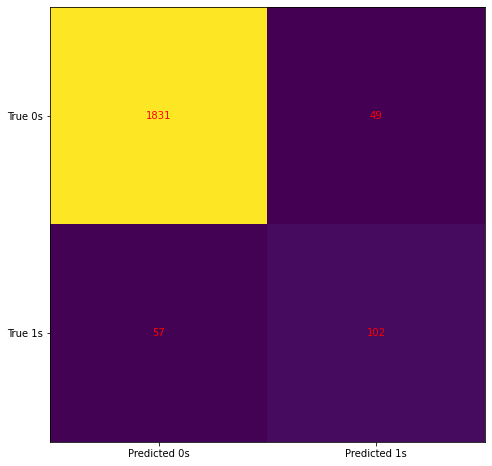

Test accuracy =  0.9480137322216773
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1880
           1       0.68      0.64      0.66       159

    accuracy                           0.95      2039
   macro avg       0.82      0.81      0.81      2039
weighted avg       0.95      0.95      0.95      2039



In [92]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  ##statsmodel package used as the model summary contains more statistical info
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

base_model = sm.Logit(y_train,x_train).fit()
predictY = base_model.predict(x_test)
predictY = list(map(round, predictY))

cm = confusion_matrix(y_test, predictY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0s', 'True 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Test accuracy = ', accuracy_score(y_test, predictY))

classification_rep = classification_report(y_test, predictY)
print(f"Classification Report:\n{classification_rep}")

In [93]:
print(base_model.summary()) 

                           Logit Regression Results                           
Dep. Variable:                     gh   No. Observations:                 4756
Model:                          Logit   Df Residuals:                     4721
Method:                           MLE   Df Model:                           34
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.4797
Time:                        02:37:15   Log-Likelihood:                -796.93
converged:                       True   LL-Null:                       -1531.5
Covariance Type:            nonrobust   LLR p-value:                3.225e-287
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                      0.6284      0.108      5.797      0.000       0.416       0.841
tx                                       0.5698      

<font color='blue'><b>From the confusion matrix, it can be seen that the model's performance is not very good, around 36% of the diabetes are not captured. From the summary of the model, it can be seen that several features have very high p-values, meaning there is a decent chance they have little impact on the model. Therefore, a new list of regressors is created with these columns removed. Notice that the requirement is very low here, any regressor with p-value smaller than 0.05 are kept. This is because this same shortened list of features will be used for performance comparison in decision tree and random forest and a larger collection of features would allow formation of more complex(deeper) decision trees. <b><font>

Optimization terminated successfully.
         Current function value: 0.586963
         Iterations 7


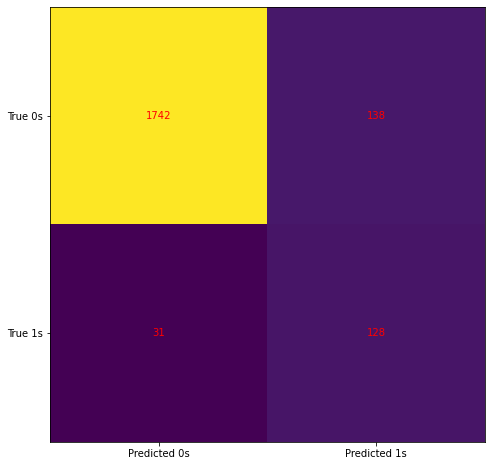

Test accuracy =  0.9171162334477685


In [94]:
X_1 = df_normalized[['age','tx','dx','waist','sub','albumin']]
x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(X_1,y,test_size=0.3,random_state=0)

new_model = sm.Logit(y_train_1,x_train_1).fit()
predictY = new_model.predict(x_test_1)
predictY = list(map(round, predictY))
cm = confusion_matrix(y_test_1, predictY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0s', 'True 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Test accuracy = ', accuracy_score(y_test_1, predictY))

In [95]:
print(new_model.summary())

                           Logit Regression Results                           
Dep. Variable:                     gh   No. Observations:                 4756
Model:                          Logit   Df Residuals:                     4750
Method:                           MLE   Df Model:                            5
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                 -0.8227
Time:                        02:38:12   Log-Likelihood:                -2791.6
converged:                       True   LL-Null:                       -1531.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0563      0.035      1.587      0.112      -0.013       0.126
tx             1.5817      0.101     15.667      0.000       1.384       1.780
dx             0.2542      0.049      5.144      0.0

<font color='blue'><b>From the result it can be seen that the new model has about the same overall performance as the old one, but the false positive rate has dropped to 19.5%. So the fine-tuning will be based on this new model. For tuning hyperparameters, the sklearn model library is used instead since it supports custom input for hyperparameters like solver, etc which is not supported in statsmodel package.<font><b>

In [81]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver='newton-cg', random_state=0).fit(x_train, y_train)
print(model1.score(x_test,y_test))
confusion_matrix(y_test, model1.predict(x_test))

0.9509563511525257


array([[1830,   50],
       [  50,  109]])

In [82]:
model2 = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1').fit(x_train, y_train)
print(model2.score(x_test,y_test))
confusion_matrix(y_test, model2.predict(x_test))

0.9509563511525257


array([[1830,   50],
       [  50,  109]])

In [83]:
model3 = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l2').fit(x_train, y_train)
print(model3.score(x_test,y_test))
confusion_matrix(y_test, model3.predict(x_test))

0.9509563511525257


array([[1829,   51],
       [  49,  110]])

In [84]:
model3 = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l2',C=3).fit(x_train, y_train)
print(model3.score(x_test,y_test))
confusion_matrix(y_test, model3.predict(x_test))

0.9509563511525257


array([[1830,   50],
       [  50,  109]])

In [85]:
model3 = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l2',C=0.5).fit(x_train, y_train)
print(model3.score(x_test,y_test))
confusion_matrix(y_test, model3.predict(x_test))

0.9509563511525257


array([[1829,   51],
       [  49,  110]])

<font color='blue'><b>As shown above, the solver of liblinear, default penalty of L2 and default regularization strength of 1 will produce a 
decent result already.<font color><b>

<font color='blue' size="+2"><b>Decision Tree:<b><font>
<font color='blue'><b> <b><font>

<font color = 'blue'><b>For Hyperparameters tuning for the decision tree, the default splitter of 'best' will be used since there are not that many features and the computation is rather fast, for the same reason max_features will not be tuned. Critererion of both gini and entropy will be tested even though they are very similar. Since the performance of the model on training data suggests there might be overfitting, max_depth and  min_samples_leaf will be tuned.<b><font>

In [96]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 20)]
random_grid = {'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
dt = DecisionTreeClassifier()

##original non split data is used since cross-validation willbe performed in randomizedSearch already
tuned_dt = RandomizedSearchCV(estimator = dt, param_distributions = random_grid,n_iter = 100,cv = 3,random_state=18).fit(X,y)
print(tuned_dt.best_params_)

{'min_samples_leaf': 7, 'max_depth': 1}


In [97]:
tuned_dt = DecisionTreeClassifier(max_depth =2 ,min_samples_leaf=14).fit(x_train,y_train)
print(tuned_dt.score(x_train,y_train))
print(tuned_dt.score(x_test,y_test))
confusion_matrix(y_test, tuned_dt.predict(x_test))

0.9373423044575273
0.9519372241294752


array([[1828,   52],
       [  46,  113]])

In [99]:
column_names = features.columns
print(column_names)

Index(['age', 'tx', 'dx', 'wt', 'ht', 'bmi', 'leg', 'arml', 'armc', 'waist',
       'tri', 'sub', 'albumin', 'bun', 'SCr', 'sex_female', 'sex_male',
       're_Mexican American', 're_Non-Hispanic Black', 're_Non-Hispanic White',
       're_Other Hispanic', 're_Other Race Including Multi-Racial',
       'income_< 20000', 'income_> 20000', 'income_>= 100000',
       'income_[0,5000)', 'income_[10000,15000)', 'income_[15000,20000)',
       'income_[20000,25000)', 'income_[25000,35000)', 'income_[35000,45000)',
       'income_[45000,55000)', 'income_[5000,10000)', 'income_[55000,65000)',
       'income_[65000,75000)', 'income_[75000,100000)'],
      dtype='object')


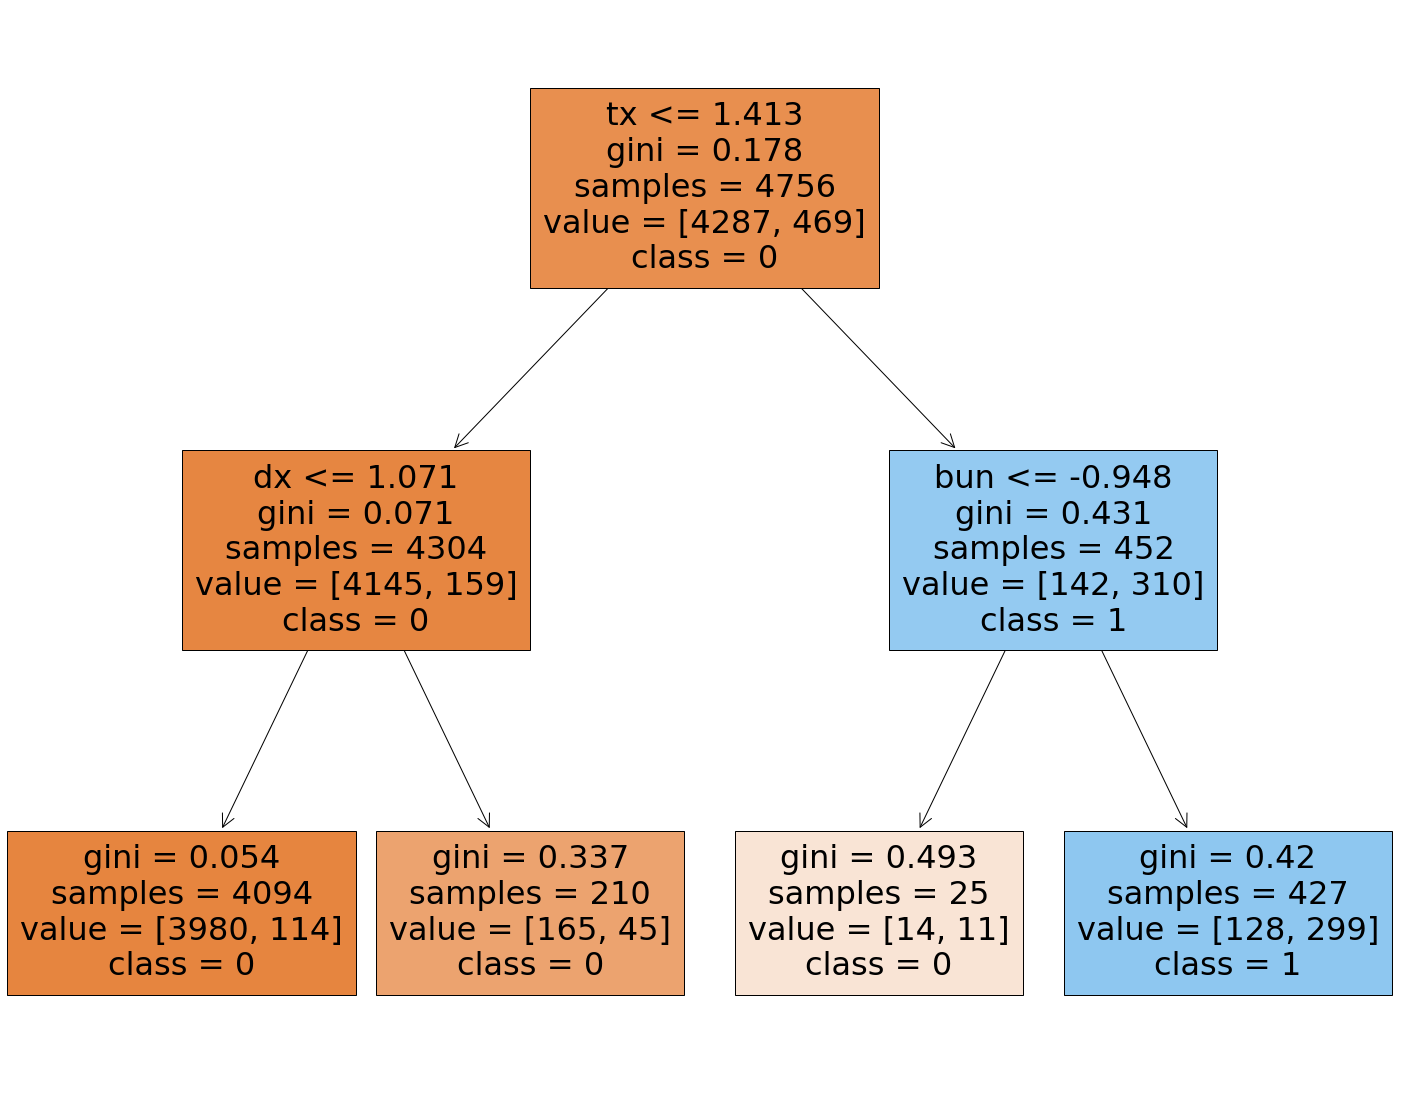

In [100]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tuned_dt, 
                feature_names=['age', 'tx', 'dx', 'wt', 'ht', 'bmi', 'leg', 'arml', 'armc', 'waist',
       'tri', 'sub', 'albumin', 'bun', 'SCr', 'sex_female', 'sex_male',
       're_Mexican American', 're_Non-Hispanic Black', 're_Non-Hispanic White',
       're_Other Hispanic', 're_Other Race Including Multi-Racial',
       'income_< 20000', 'income_> 20000', 'income_>= 100000',
       'income_[0,5000)', 'income_[10000,15000)', 'income_[15000,20000)',
       'income_[20000,25000)', 'income_[25000,35000)', 'income_[35000,45000)',
       'income_[45000,55000)', 'income_[5000,10000)', 'income_[55000,65000)',
       'income_[65000,75000)', 'income_[75000,100000)'],  
                   class_names=['0','1'],
                   filled=True)


<font color='blue'><b>The result of a tuned decision tree is as shown above. <font><b>

<font color='blue' size="+2"><b>Random Forest<b><font>

In [101]:
from sklearn.ensemble import RandomForestClassifier

base_rf = RandomForestClassifier(random_state=18).fit(x_train,y_train)
print(base_rf.score(x_train,y_train))
print(base_rf.score(x_test,y_test))
confusion_matrix(y_test, base_rf.predict(x_test).round())

1.0
0.9494850416871016


array([[1830,   50],
       [  53,  106]])

<font color='blue'><b>For the optimization of Random Forest, max_depth, bootstrap,max_features,min_sample_leaf, min_samples_split and n_estimators will be used.<b><font>

In [102]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2,3,5,7,10]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=18, n_jobs = -1)
rf_random.fit(X,y)
print(rf_random.best_params_)

{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': False}


In [106]:
tuned_rf = RandomForestClassifier(random_state=18,max_depth=8,n_estimators=70,min_samples_split=8,min_samples_leaf=8,max_features='sqrt',bootstrap=False).fit(x_train,y_train)
print(tuned_rf.score(x_train,y_train))
print(tuned_rf.score(x_test,y_test))
confusion_matrix(y_test,tuned_rf.predict(x_test).round())

0.9468040370058873
0.9538989700833742


array([[1831,   49],
       [  45,  114]])

<font color='blue'>It can be seen that the random forest performs about the same as the decision tree. To further investigate the performance of the random forest, a tree from it will be plotted. <b><font><b>

In [107]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(tuned_rf.estimators_[0],
                   feature_names=['age', 'tx', 'dx', 'wt', 'ht', 'bmi', 'leg', 'arml', 'armc', 'waist',
       'tri', 'sub', 'albumin', 'bun', 'SCr', 'sex_female', 'sex_male',
       're_Mexican American', 're_Non-Hispanic Black', 're_Non-Hispanic White',
       're_Other Hispanic', 're_Other Race Including Multi-Racial',
       'income_< 20000', 'income_> 20000', 'income_>= 100000',
       'income_[0,5000)', 'income_[10000,15000)', 'income_[15000,20000)',
       'income_[20000,25000)', 'income_[25000,35000)', 'income_[35000,45000)',
       'income_[45000,55000)', 'income_[5000,10000)', 'income_[55000,65000)',
       'income_[65000,75000)', 'income_[75000,100000)'],  
                   class_names=['0','1'],
                   filled=True)

In [109]:
feature_importances = tuned_rf.feature_importances_

# Match feature importances with column names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

tx: 0.44708149565427285
dx: 0.2498071073225313
age: 0.04783605951170129
waist: 0.04436936380996
bmi: 0.02742942745362506
armc: 0.021225622972379888
SCr: 0.019758636499216373
leg: 0.018420392696250034
wt: 0.018269998255255045
sub: 0.01815039772071049
tri: 0.014755654104373796
bun: 0.014703236714937845
arml: 0.013710944688169033
ht: 0.013094284026486923
albumin: 0.011054824980636922
re_Non-Hispanic White: 0.0039925301394862795
sex_male: 0.002972162310150932
re_Mexican American: 0.0027942540704926737
sex_female: 0.002279440809200591
re_Other Race Including Multi-Racial: 0.0018970604545158012
income_[25000,35000): 0.001295566463993123
re_Non-Hispanic Black: 0.0010448605761959
income_[10000,15000): 0.00072255827477972
income_>= 100000: 0.0006550052619090365
income_[75000,100000): 0.0006276129647584327
income_[45000,55000): 0.00048370726493820885
income_[5000,10000): 0.0003859005505713667
income_[35000,45000): 0.00035273363021336005
income_[20000,25000): 0.00021812118833489322
income_[15000,

<font color = 'blue'><b>It can be seen that compared to a single decision tree, the tree in this random forest is much deeper which could be a result from the larger collection of regressors available. Feature tx and dx still remain as the important feature for predicting diabetes. Tests were carried out to reduce the features according to the feature importance, but this does not have a positive impact on the false positive rate (identify diabetes).<b><font>

<font color='blue' size="+2"><b>Conclusion<b><font>


<font color='blue'><b>From the three results, it can be seen that the three models actually perform comparable to one another in terms of accuracy. One possible reason for this could the limit number of actual useful features, notice how decision tree only used three features and achieved great performance already. However, the tuned logistic regression model has the lowest false positive rate, indicating the best preformance in predicting diabetes patients. <b><font>